## <span style="color:green">  ESERCITAZIONE 1</span>

### <span style="color:blue">  Esercizio 01.1</span>
<span style="color:blue">  1. Testa il generatore di Numeri Pseudo Casuali stimando: $\langle r \rangle = \int_0^1 r dr = 1/2$.</span>

L'obiettivo di questo esercizio è calcolare l'integrale sopra indicato in maniera numerica. Per iniziare a calcolare gli integrali numericamente abbiamo deciso di partire proprio da questo perché è possibile calcolarlo in maniera analitica e sappiamo che il risultato è $1/2$. Ho scritto un codice in C++ che sfrutta il metodo della media a blocchi per calcolare il valor medio di $r$. Il generatore di numeri casuali in questo caso genera dei numeri in una distribuzione uniforme tra 0 e 1. 

Il numero di blocchi generati è 100, il numero di elementi in ciascun blocco è 1000, quindi il numero totale di lanci giunti al centesimo blocco è 100000. Ad ogni ciclo del codice calcolo la media a blocchi per un numero sempre crescente di blocchi. Parto da un blocco, poi su due blocchi, poi su tre, fino ad arrivare a 100 blocchi. Calcolo la media di ogni blocco, poi faccio la media delle medie di ogni blocco e per questo valore calcolo l'incertezza statistica. Il codice C++ presenta, ad ogni passaggio, il relativo commento su che cosa fa. 

Nel grafico sono rappresentati: in ascissa il numero totale di lanci che cresce ad ogni passo per l'aggiunta di un blocco, in ordinata la media calcolata per quel numero di lanci e la barra di errore è l'incertezza statistica per quel numero di lanci. Con il colore verde è tracciata una retta che indica il valor medio dell'integrale calcolato analiticamente: è il valore teorico che l'esperimento deve riproporre. Se le barre di errore intersecano la retta del valore teorico, vuol dire l'accordo teoria-esperimento è stato raggiunto.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

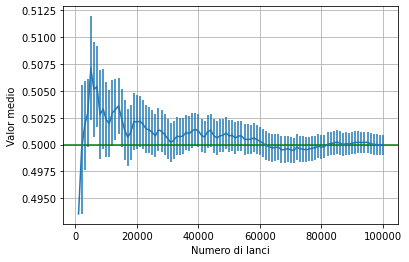

In [2]:
x, f, error = np.loadtxt("media.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=0.5, color='green')
plt.xlabel('Numero di lanci')
plt.ylabel('Valor medio')
plt.grid(True)
plt.show()

Possiamo osservare che, con l'aumentare del numero di valori generati, la media diventa sempre più precisa e converge al valore teorico atteso. Guardiamo il grafico da sinistra a destra. Nel caso iniziale di un blocco (numero valori generati=1000), l'incertezza è posta automaticamente a 0 perché non è possibile calcolarla. Nel caso di due blocchi, l'incertezza è grande e con l'aumentare del numero di blocchi si riduce sempre più. A partire da 60 blocchi (numero valori generati=60000), la convergenza del valor medio calcolato numericamente verso la retta del valore teorico, diventa più precisa.

Abbiamo trovato che la convergenza tra valore teorico e valori sperimentali è buona ed è buono anche il generatore di numeri casuali.

<span style="color:blue">  2. Testa il generatore di Numeri Pseudo Casuali stimando: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

Ripropongo lo stesso esercizio di prima ma cambia l'integrale da calcolare. Verifico che il valore teorico indicato e il valore calcolato numericamente con il metodo della media a blocchi, convergano. Il codice C++ usato è lo stesso, cambia la funzione da integrare. Uso sempre una distribuzione uniforme tra 0 e 1.

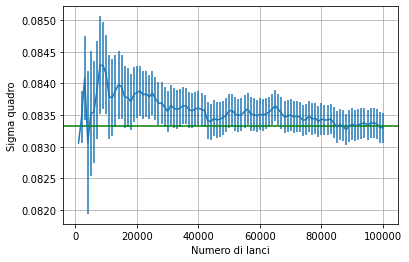

In [3]:
x, f, error = np.loadtxt("sigma_quadro.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=0.0833333, color='green')
plt.xlabel('Numero di lanci')
plt.ylabel('Sigma quadro')
plt.grid(True)
plt.show()

Osserviamo che fino a 70 blocchi (numero valori generati=70000) la convergenza della curva sperimentale è un po'al limite. Le barre di errore toccano la linea teorica con i loro estremi inferiori. Tra 71 e 86 blocchi la convergenza diventa buona e tra 87 e 100 blocchi la curva sperimentale si sovrappone alla linea teorica. La convergenza diventa buona dopo aver generato 87000 valori casuali. 

<span style="color:blue">  3. Implementa il test di chi quadro $\chi^2$.</span>

La formula per il calcolo di chi quadro è: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ Essendo: $n_i = $ numero di estrazioni favorevoli per l'intervallo i-esimo, $n = $ numero di estrazioni totali nell'intervallo i-esimo, $M = $ numero totale di sotto intervalli in cui suddivido l'intervallo iniziale $[0,1]$. Il codice svolge questo procedimento: 
1. suddivido l'intervallo $[0,1]$ in $M=100$ sottointervalli;
2. per ogni sottointervallo $[0,0.01],[0.01,0.02],...,[0.99,1]$ estraggo $n=10000$ valori casuali tra $[0,1]$;
3. confronto ciascuno degli n valori con l'intervallo i-esimo: se il valore appartiene all'intervallo, incremento $n_i$ di 1;
4. ottengo un vettore $n_i[M]$ di $M$ numeri interi, ossia gli "hits" per ogni sotto intervallo;
5. calcolo il chi quadro parziale per ciascuno dei sotto intervalli, usando la formula sopra: li metto in un altro vettore;
6. sommo tutti gli $M=100$ valori e calcolo il chi quadro $\chi^2$.

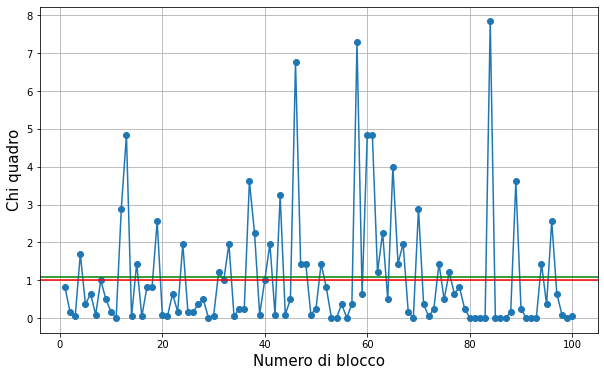

In [8]:
plt.figure(figsize=(10,6))
x, f = np.loadtxt("chi_quadro.dat", usecols=(0,1), delimiter='  ', unpack='true')

plt.plot(x,f,'o-')
plt.axhline(y=1.0, color='red')
plt.axhline(y=1.0804, color='green')

plt.xlabel('Numero di blocco', fontsize=15)
plt.ylabel('Chi quadro', fontsize=15)
plt.grid(True)
plt.show()

Nel grafico è rappresentato un plot di $\chi_i^2$ per $i = 1,2,...,100$. Si ottiene sommandoli tutti $\chi^2 = 108,04$, quindi $\chi^2 \simeq 100$, come indicato nel testo dell'esercizio. Il valore medio di $\chi_i^2$ calcolato dal codice è $1.0804$. L'andamento di $\chi_i^2$ è oscillante attorno ad un valore ideale che è $1$. Allora non possiamo dire che i nostri numeri non siano estratti da una distribuzione uniforme. Possiamo dunque considerare i nostri numeri uniformemente distribuiti. 

### <span style="color:blue">  Esercizio 01.2</span>
<span style="color:blue">  1. Estendi il generatore di Numeri Pseudo Casuali aggiungendo due distribuzioni di probabilità: Esponenziale e Lorentziana. </span>

L'obiettivo di questo esercizio è aggiungere al generatore di numeri casuali che ci è stato donato, due nuove distribuzioni di probabilità: una generica distribuzione esponenziale e una generica distribuzione di Cauchy-Lorentz. Per fare questo utilizziamo il metodo dell'inversione della distribuzione cumulativa. Le distribuzioni di partenza, rispettivamente esponenziale e di Cauchy-Lorentz, sono: 
\begin{equation}
   p(x) = \lambda \exp(-\lambda x), x\in [0;+\infty), \quad \quad p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, x\in (-\infty;+\infty).
\end{equation}

Data una distribuzione di probabilità $p(x)$, la distribuzione cumulativa è una funzione $F(x)$ definita in questo modo: 
\begin{equation}
   p(x) = \frac{dF(x)}{dx}.
\end{equation}

Perché utilizziamo il metodo dell'inversione della funzione cumulativa? Consideriamo una funzione $y=F(x)$ nota e analiticamente invertibile, allora $x=F^{-1}(y)$ è una variabile random con distribuzione di probabilità $p(x) = \frac{dF(x)}{dx}$, ma soprattutto, $y$ è una variabile estratta da una distribuzione uniforme $[0,1)$, ossia possiamo utilzzare il nostro generatore di numeri pseudo casuali. Calcolando e invertendo le distribuzioni cumulative relative alle due $p(x)$ sopra indicate, si ottengono le due $x$, rispettivamente per la distribuzione esponenziale e per la distribuzione di Cauchy-Lorentz:
\begin{equation}
   x = -\frac{1}{\lambda}ln\left(1-y\right), y\in [0,1) \quad \quad x = \Gamma tan \left[\pi \left(y-\frac{1}{2}\right)\right], y\in [0,1).
\end{equation}

Le due nuove funzioni prendono un valore random tra $0$ e $1$ e restituiscono una variabile $x$ che ha la distribuzione di probabilità desiderata. La distribuzione di Cauchy-Lorentz deve essere centrata in un punto medio $\mu$. I parametri $\lambda$ e $\Gamma$ devono essere forniti dall'utente. 

<span style="color:blue">  2. Realizza i tre grafici come richiesto dal testo dell'esercizio e testa il Teorema del Limite Centrale. </span>

L'obiettivo di questo esercizio è testare il Teorema del Limite Centrale. Siano dati $M$ valori estratti con una certa densità di probabilità e si dispongano in un istogramma. Il Teorema del Limite Centrale dice che, se si accresce il valore di $M$ fino a tendere all'infinito, l'area descritta dai bin dell'istogramma tenderà ad essere l'area sotto la curva della funzione descritta dalla densità di probabilità e il picco della curva sarà nel punto medio. 

Faremo i grafici per i tre dadi: standard, esponenziale e Lorentziano. In ciascun grafico compariranno quattro istogrammi, realizzati con quattro valori di M diversi. Andremo a verificare che, con il crescere di M, otterremo rispettivamente queste curve: Gaussiana, Esponenziale e Lorentziana. In ciascun istogramma ci sono $M = 10^4$ punti, ciascuno di loro ottenuto facendo la media di $N$ valori. Disegneremo i quattro istogrammi per $N = 1, 2, 10, 100$; di conseguenza, i valori usati per riempire i bin sono: $L = 10^4, 2\times 10^4, 10^5, 10^6$. Ci aspettiamo che gli istogrammi realizzati con $10^6$ valori siano prossimi alle curve che descrivono la corrispondente densità di probabilità. Di seguito sono riportati le tre figure per i tre dadi.

### 1. Dado Standard

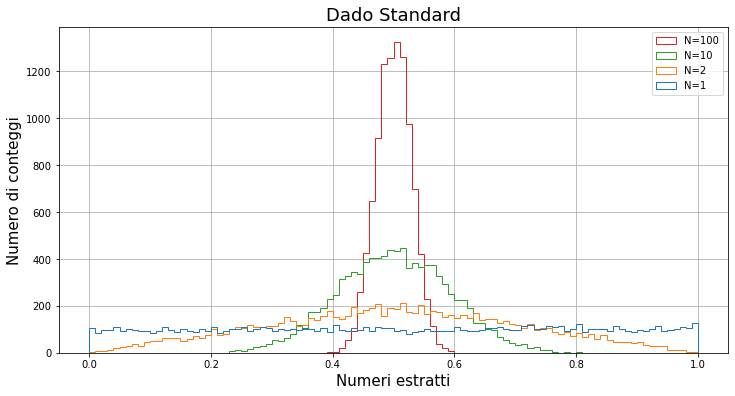

In [25]:
plt.figure(figsize=(12,6))

std_1 = np.loadtxt("Standard_dice.dat", usecols=(1), delimiter='  ', unpack='true')
std_2 = np.loadtxt("Standard_dice.dat", usecols=(2), delimiter='  ', unpack='true')
std_10 = np.loadtxt("Standard_dice.dat", usecols=(3), delimiter='  ', unpack='true')
std_100 = np.loadtxt("Standard_dice.dat", usecols=(4), delimiter='  ', unpack='true')

n_bins = 100
std_dice_hist = plt.hist([std_1,std_2,std_10,std_100], n_bins, label=['N=1','N=2','N=10','N=100'], range=(0,1), histtype='step')

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado Standard', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

Osserviamo che per $N=1$ la distribuzione è piatta. Con l'aumentare del numero di lanci, la figura prende sempre di più la forma di una Gaussiana. La curva diventa sempre più alta e più stretta e il picco si trova a $0.5$, il valor medio di questa Gaussiana. 

### 2. Dado Esponenziale

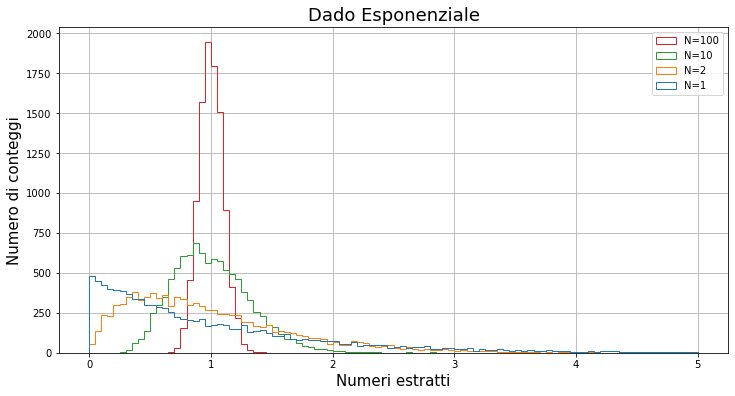

In [26]:
plt.figure(figsize=(12,6))

exp_1 = np.loadtxt("Exponential_dice.dat", usecols=(1), delimiter='  ', unpack='true')
exp_2 = np.loadtxt("Exponential_dice.dat", usecols=(2), delimiter='  ', unpack='true')
exp_10 = np.loadtxt("Exponential_dice.dat", usecols=(3), delimiter='  ', unpack='true')
exp_100 = np.loadtxt("Exponential_dice.dat", usecols=(4), delimiter='  ', unpack='true')

n_bins = 100
exp_dice_hist = plt.hist([exp_1,exp_2,exp_10,exp_100], n_bins, label=['N=1','N=2','N=10','N=100'], range=(0,5), histtype='step')

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado Esponenziale', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

Osserviamo che per $N=1$ il picco si trova in $0$ e la curva è monotona decrescente. Con L'aumentare di $N$, il picco si sposta verso destra e la curva diventa sempre più alta e più stretta, fino a raggiungere il massimo in $1$ per $N=100$. In questo caso la curva assomiglia ad una Gaussiana.

### 3. Dado Lorentziano

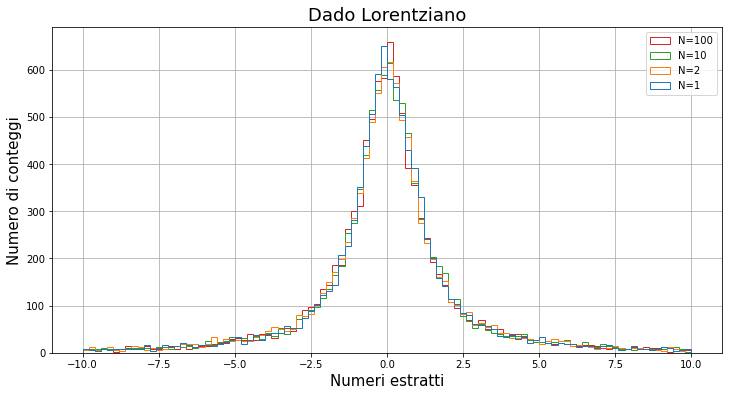

In [27]:
plt.figure(figsize=(12,6))

lor_1 = np.loadtxt("Lorentzian_dice.dat", usecols=(1), delimiter='  ', unpack='true')
lor_2 = np.loadtxt("Lorentzian_dice.dat", usecols=(2), delimiter='  ', unpack='true')
lor_10 = np.loadtxt("Lorentzian_dice.dat", usecols=(3), delimiter='  ', unpack='true')
lor_100 = np.loadtxt("Lorentzian_dice.dat", usecols=(4), delimiter='  ', unpack='true')

n_bins = 100
lor_dice_hist = plt.hist([lor_1,lor_2,lor_10,lor_100], n_bins, label=['N=1','N=2','N=10','N=100'], range=(-10,10), 
                         histtype='step')

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado Lorentziano', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

Nel caso del dado Lorentziano, le quattro curve sono abbastanza sovrapposte. Hanno una forma simile, stessa larghezza e hanno tutte il picco in $0$, che abbiamo posto come media della curva. I punti si estendono nell'intervallo $[-25,25]$, ma ho deciso di mostrare l'intervallo $[-10,10]$ perché al di fuori il numero di conteggi è circa $0$ e facendo questo zoom si vede meglio la fluttuazione dei bin dell'istogramma.

In tutti e tre i casi, osserviamo che con l'aumentare del numero di eventi, la curva si modifica fino ad assomigliare alla curva che rappresenta la densità di probabilità con cui estraiamo gli eventi. A parità di area sottesa, la curva diventa più alta e più stretta ed e centrata nel punto medio della densità di probabilità. Abbiamo verificato il Teorema del Limite Centrale. 

### 4.Fit degli istogrammi con le funzioni densità di probabilità corrispondenti.

E' possibile, per i casi $N=100$, fare il fit con la curva Gaussiana per i dadi standard ed esponenziale e con la curva di Cauchy-Lorentz per il dado Lorentiziano. Ho realizzato i grafici per i tre casi. Ogni grafico presenta tre curve: l'istogramma con i bin (azzurro), la curva che si ottiene rendendo l'istogramma curvo (arancione) e la curva del fit (verde) calcolata grazie al metodo curve_fit. Il fit non mi viene. La curva verde dovrebbe sovrapporsi a quella arancione, invece viene come un picchettino stretto che almeno è centrato nel picco dell'istogramma. Facendo stampare i risultati del fit si ottengono risultati non corretti e con incertezza alta. Consapevole del fatto che vengano sbagliati, mostro i risultati del fit e i grafici lo stesso.

In [11]:
from scipy.optimize import curve_fit

#Definisco le curve con cui fare il fit: Gaussiana e Lorentziana
def Gauss(x, mean, sigma):
    return 1.0 / (sigma * np.sqrt(2.0 * np.pi)) * np.exp(-(x - mean)**2 / (2.0 * sigma**2))
def Lorentz(x, x0, y0):
    return 1. / np.pi * y0 / ((x - x0)**2 + y0**2)

#x = np.linspace(0.01,1.0,100)
#x = np.arange(0,1,0.01)

optimized parameters [mean,sigma] =
[5.09881714e-01 2.74622763e-04]
parameters uncertainty =
[16470.30452198  8709.90759579]


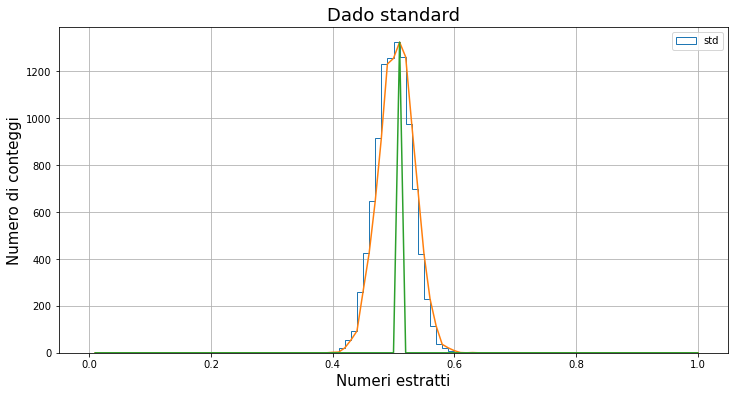

In [12]:
plt.figure(figsize=(12,6))

n_bins = 100 #Numero di bin. Carico i dati per gli istogrammi e faccio l'istogramma.
std_dice = np.loadtxt("Standard_dice.dat", usecols=(4), delimiter='  ', unpack='true')
std_hist = plt.hist(std_dice, n_bins, label=['std'], range=(0,1), histtype='step')

x = std_hist[1][1:]  #x del grafico dell'istogramma: 0.01,0.02,...,1.0
f = std_hist[0][:]   #y del grafico dell'istogramma: quanti elementi in ogni bin
plt.plot(x, f)

p_opt, p_cov = curve_fit(Gauss, x, f)
y_fit = Gauss(x,p_opt[0],p_opt[1])
plt.plot(x,y_fit) #Plot dei dati fatto il fit.

print("optimized parameters [mean,sigma] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado standard', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

optimized parameters [mean,sigma] =
[1.00004857e+00 1.99317103e-04]
parameters uncertainty =
[10617.61593817  2750.88348062]


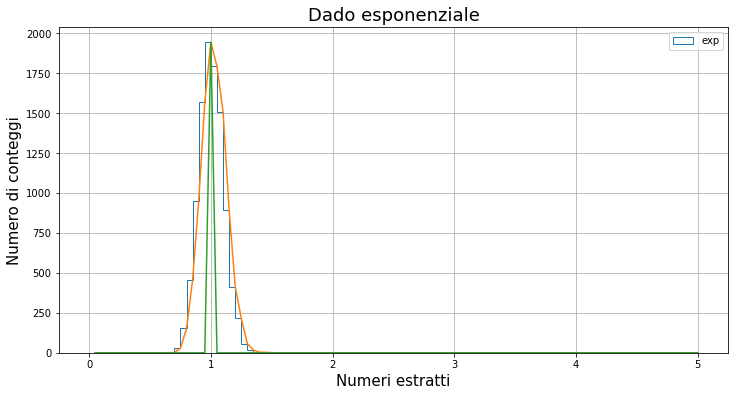

In [13]:
plt.figure(figsize=(12,6))

n_bins = 100 #Numero di bin. Carico i dati per gli istogrammi e faccio l'istogramma.
exp_dice = np.loadtxt("Exponential_dice.dat", usecols=(4), delimiter='  ', unpack='true')
exp_hist = plt.hist(exp_dice, n_bins, label=['exp'], range=(0,5), histtype='step')

x = exp_hist[1][1:]  #x del grafico dell'istogramma: 0.01,0.02,...,1.0
f = exp_hist[0][:]   #y del grafico dell'istogramma: quanti elementi in ogni bin
plt.plot(x, f)

p_opt, p_cov = curve_fit(Gauss, x, f)
y_fit = Gauss(x, p_opt[0], p_opt[1])
plt.plot(x,y_fit) #Plot dei dati fatto il fit.

print("optimized parameters [mean,sigma] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado esponenziale', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

optimized parameters [mean,sigma] =
[4.99985832e-01 2.05721175e-04]
parameters uncertainty =
[918.235749   127.04962387]


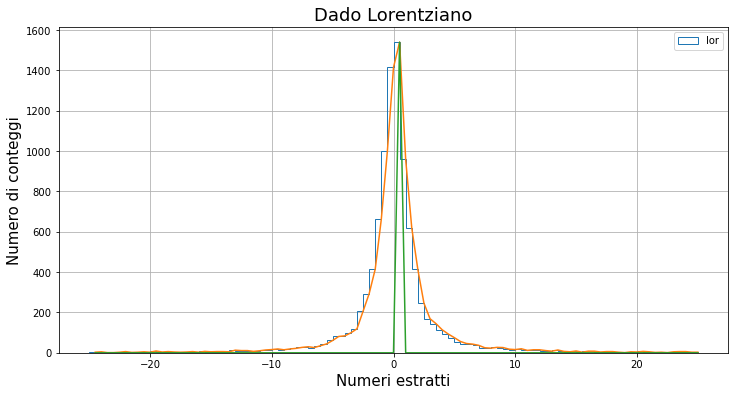

In [14]:
plt.figure(figsize=(12,6))

n_bins = 100 #Numero di bin. Carico i dati per gli istogrammi e faccio l'istogramma.
lor_dice = np.loadtxt("Lorentzian_dice.dat", usecols=(4), delimiter='  ', unpack='true')
lor_hist = plt.hist(lor_dice, n_bins, label=['lor'], range=(-25,25), histtype='step')

x = lor_hist[1][1:]  #x del grafico dell'istogramma: 0.01,0.02,...,1.0
f = lor_hist[0][:]   #y del grafico dell'istogramma: quanti elementi in ogni bin
plt.plot(x, f)

p_opt, p_cov = curve_fit(Lorentz, x, f)
y_fit = Lorentz(x, p_opt[0], p_opt[1])
plt.plot(x,y_fit) #Plot dei dati fatto il fit.

print("optimized parameters [mean,sigma] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.xlabel('Numeri estratti', fontsize=15)
plt.ylabel('Numero di conteggi', fontsize=15)
plt.title('Dado Lorentziano', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

Il fit degli istogrammi non viene come dovrebbe. In azzurro è indicato l'istogramma, in giallo la curva che prende i punti dell'istogramma e in verde è la curva Gaussiana nei primi due grafici e Lorentziana nel terzo grafico che fanno il fit agli istogrammi. La curva verde dovrebbe sovrapporsi a quella gialla invece viene un picco stretto al centro e zero ai lati: non va bene. 

### <span style="color:blue">  Esercizio 01.3</span>
<span style="color:blue">  1. Simula l'esperimento di Buffon per calcolare il valore di $\pi$ . </span>

Una sbarretta di lunghezza $L$ è lanciata casualmente su un pavimento che immaginiamo sia fatto come un parquet di strisce verticali parallele poste a distanza $d$. Sia $L>d$, ma non molto maggiore. Lanciamo la sbarretta un numero molto elevato di volte, fino a ricoprire tutto il pavimento. Gli eventi favorevoli sono quelli in cui la sbarretta cade sul bordo della striscia, ossia se interseca due strisce vicine del parquet. La probabilità $P$ che la sbarretta intersechi la linea che separa le due strisce di parquet è: $P = 2L/\pi d$ e può essere utilizzata per calcolare il valore di $\pi$. Se la sbarretta è lanciata sul pavimento per $N_{thr}$ volte e colpisce una linea per $N_{hit}$ volte, possiamo fare una stima di $\pi$ usando la formula:
\begin{equation}
   \pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}
\end{equation}

Immaginiamo che la nostra sbarretta sia un ago. Lanciando l'ago sul pavimento, la cruna cadrà in un punto all'interno della striscia di spessore $d$. Considero solo la coordinata ortogonale alla linea ed è la distanza $A$ tra la linea separatrice e la cruna. L'ago formerà un angolo con la retta ortogonale alla linea separatrice, su cui si trova la cruna. Chiamiamo $\theta$ l'angolo opposto alla retta: quindi la punta dell'ago avrà coordinate $(x,y) = (cos\theta,sin\theta)$.

Poiché le strisce del pavimento sono tutte identiche, possiamo lavorare solo all'interno di una striscia che ha estremi $(0,d)$. Tutte le altre strisce si otterrebbero traslando la prima e avrebbero estremi: $(d,2d),(2d,3d),...$, ma non servono. Ai fini dell'esperimento, ci interessa conoscere la posizione dell'ago solo relativamente alla striscia e non a tutto il pavimento.
Possiamo supporre che l'ago colpisca la striscia solo sul lato destro, perché traslandola sul piano, ricopre tutto il pavimento. Possiamo allora estrarre $cos\theta$ e $sin\theta$ nell'intervallo $[0,1]$: in questo modo, con il nostro generatore di numeri casuali campioniamo il quarto di cerchio con coordinate $x>0$ e $y>0$.

La distanza tra la punta dell'ago e la linea separatrice vale: $B = A+Lsin\theta$. Se questa distanza è maggiore della lunghezza della striscia $d$, allora l'ago è caduto su una linea separatrice: questo è un evento favorevole e incrementiamo $N_{hit}$ di $1$. Ripetiamo il calcolo per $N_{thr}$ volte e otteniamo la stima di $\pi$ secondo la formula sopra. Scegliamo come valori: $d=5$ , $L=4$ ed $N_{thr}=10^{5}$. Eseguiamo il calcolo con il medoto della media a blocchi, in modo che la stima diventi sempre più precisa. Il numero totale di blocchi è $100$, ossia il numero di esperimenti, ciascuno fatto di $10^{3}$ valori di $\pi$ calcolati.

Il testo dell'esercizio dice di fare l'esperimento per $N_{thr}=10^{6}$. All'inizio ho provato proprio con questo valore di $N_{thr}$, ma la macchina non sopporta l'enorme quantità di calcoli e si interrompe l'esperimento. Allora ho abbassato il valore di elementi a $N_{thr}=10^{5}$. La simulazione dura circa $20$ minuti.

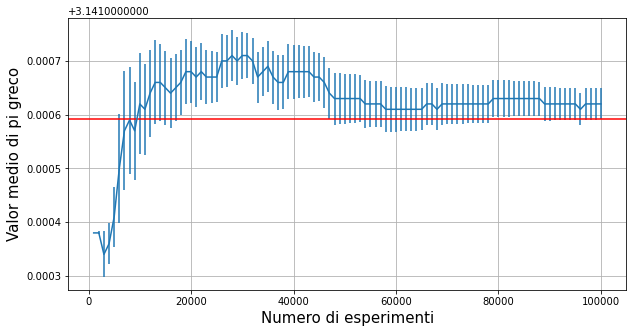

In [2]:
import math

plt.figure(figsize=(10,5))
x, f, error = np.loadtxt("pi_medio.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

plt.errorbar(x,f,yerr=error)
plt.axhline(y=math.pi, color='red')
plt.xlabel('Numero di esperimenti', fontsize=15)
plt.ylabel('Valor medio di pi greco', fontsize=15)

plt.grid(True)
plt.show()

Questo grafico è corretto ma presenta un'anomalia. In alcuni tratti il valore di $\pi$ non varia mai: è una costante. Questo avviene perché il codice stampa i risultati fino alla quinta cifra decimale che in questi casi sono uguali per tutti. Avrei dovuto usare l'opzione *scientific calculation* che stampa i risultati fino alla quattordicesima cifra decimale e si sarebbe notata la differenza, la fluttuazione. Quando si presentano i risultati di un esperimento non ci dovrebbero essere valori progressivi costanti. La linea rossa indica il valore vero di $\pi$ che approssimato alla quinta cifra decimale è $\pi=3.14159$. La simulazione converge a $\pi=3.14162$. Il valore di $\pi$ teorico approssimato è contenuto nelle barre di errore per due volte su tre. L'esperimento è riuscito.